In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.10.0


In [2]:
# Si ves una lista con al menos un dispositivo GPU, TensorFlow la está detectando.
# Si la lista está vacía ([]), TensorFlow no está usando la GPU.
print("GPUs disponibles:", tf.config.list_physical_devices('GPU'))

GPUs disponibles: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Importación de librerias.

In [3]:
(imagenes_entrenamiento, etiquetas_entrenamiento ), (imagenes_verificacion, etiquetas_verificacion) = keras.datasets.cifar10.load_data()


Carga de conjunto de datos de imagenes para entrenamiento. 50.000 fotos en color de 32x32 pixels de aviones, trenes, autos, etc con etiquetas. 10000 fotos para testear

In [4]:
print(etiquetas_entrenamiento.shape, imagenes_entrenamiento.shape)

(50000, 1) (50000, 32, 32, 3)


In [7]:
imagenes_entrenamiento, imagenes_verificacion = imagenes_entrenamiento / 255.0, imagenes_verificacion  / 255.0

AGREGADO: Estandarizacion entre 0s y 1s

In [8]:
nombres_clases = ['airplane','automobile','bird','cat','deer',
                  'dog','frog','horse','ship','truck']

Funcion para mostrar imagenes en miniatura.

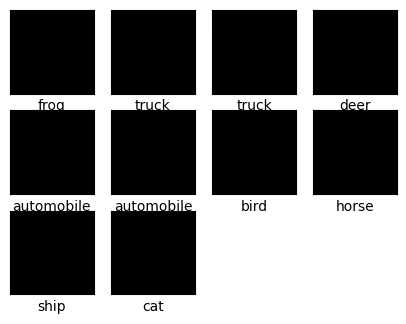

In [10]:
import matplotlib.pyplot as plt
def mostrar():
  plt.figure(figsize=(5,5))
  for i in range(10):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes_entrenamiento[i], cmap=plt.cm.binary)
    plt.xlabel(nombres_clases[etiquetas_entrenamiento[i][0]])
  plt.show()
mostrar()

Una capa de entrada para imagenes de 32x32 pixels con 3 dimensiones de colores.
Dos capas convolucionales para extraer caracteristicas, con 32 filtros de 3x3. Quitando relleno que no se ajusta.
Dos capas de agrupamiento con filtros de 2x2 para achicar la anterior.

Una capa complemtamente conectada (densa) con 64 neuronas.
Una capa de salida con 10 neuronas para clasificar.

In [11]:
capa = keras.layers
modelo = keras.models.Sequential()
modelo.add(capa.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu',
                       input_shape=(32,32,3)))
modelo.add(capa.MaxPool2D(2,2))
modelo.add(capa.Conv2D(32, 3, activation='relu' ))
modelo.add(capa.MaxPool2D(2,2))
modelo.add(capa.Flatten())

modelo.add(capa.Dense(64, activation='relu'))
modelo.add(capa.Dense(10))

modelo.summary()  #(3x3xC+1)x32 = 896 (C=Canales) 32 filtros. kernel 3x3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

Configuracion del modelo

In [12]:
modelo.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Entrenamiento (creación del modelo)

In [16]:
modelo.fit(imagenes_entrenamiento, etiquetas_entrenamiento,
           epochs=100, batch_size=64)

Epoch 1/100
782/782 [==============================] - 2s 3ms/step - loss: 1.7448 - accuracy: 0.3760
Epoch 2/100
782/782 [==============================] - 2s 3ms/step - loss: 1.6867 - accuracy: 0.3979
Epoch 3/100
782/782 [==============================] - 2s 3ms/step - loss: 1.6472 - accuracy: 0.4129
Epoch 4/100
782/782 [==============================] - 2s 3ms/step - loss: 1.6209 - accuracy: 0.4223
Epoch 5/100
782/782 [==============================] - 2s 3ms/step - loss: 1.5936 - accuracy: 0.4314
Epoch 6/100
782/782 [==============================] - 2s 3ms/step - loss: 1.5756 - accuracy: 0.4385
Epoch 7/100
782/782 [==============================] - 2s 3ms/step - loss: 1.5554 - accuracy: 0.4461
Epoch 8/100
782/782 [==============================] - 2s 3ms/step - loss: 1.5393 - accuracy: 0.4508
Epoch 9/100
782/782 [==============================] - 2s 3ms/step - loss: 1.5218 - accuracy: 0.4595
Epoch 10/100
782/782 [==============================] - 2s 3ms/step - loss: 1.5094 - accura

Loss se busca el número mas bajo. Accuracy el más alto

In [17]:
modelo.evaluate(imagenes_verificacion, etiquetas_verificacion,
                batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 1.1924 - accuracy: 0.5911


[1.192392110824585, 0.5910999774932861]

In [15]:
#predict()

**CONTINUAR DESDE ACA**